In [909]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

In [910]:
# Import our input dataset
hoops_df = pd.read_csv('../Resources/cbb.csv')
hoops_df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,Michigan St.,B10,35,26,111.4,87.8,0.9392,50.6,44.5,20.8,...,32.4,50.4,44.3,34.1,30.1,64.4,6.7,S16,3.0,2013
2451,Arizona,P12,35,27,114.4,92.2,0.9229,52.5,46.6,19.5,...,32.9,50.6,43.4,37.1,35.8,66.8,4.6,S16,6.0,2013
2452,Oregon,P12,37,28,104.8,88.6,0.8728,49.3,46.4,21.4,...,33.3,49.1,44.9,33.3,33.4,69.2,2.9,S16,12.0,2013
2453,La Salle,A10,34,24,112.0,96.2,0.8516,51.9,49.3,17.1,...,28.5,49.3,50.6,37.7,30.2,66.0,0.3,S16,13.0,2013


In [911]:
# Drop columns deemed unneeded for model
hoops_df = hoops_df.drop(["TEAM","SEED","CONF","G","YEAR"], axis=1)
hoops_df

,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON
0,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND
1,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND
2,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND
3,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND
4,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,26,111.4,87.8,0.9392,50.6,44.5,20.8,19.2,36.1,27.6,36.6,32.4,50.4,44.3,34.1,30.1,64.4,6.7,S16
2451,27,114.4,92.2,0.9229,52.5,46.6,19.5,19.8,35.0,26.7,37.4,32.9,50.6,43.4,37.1,35.8,66.8,4.6,S16
2452,28,104.8,88.6,0.8728,49.3,46.4,21.4,22.0,35.8,27.2,38.4,33.3,49.1,44.9,33.3,33.4,69.2,2.9,S16
2453,24,112.0,96.2,0.8516,51.9,49.3,17.1,21.3,29.0,34.2,31.3,28.5,49.3,50.6,37.7,30.2,66.0,0.3,S16


In [912]:
tourney_list = hoops_df['POSTSEASON'].value_counts()
tourney_list

R64          224
R32          112
S16           56
E8            28
R68           28
F4            14
2ND            7
Champions      7
Name: POSTSEASON, dtype: int64

In [913]:
# Encode teams that made the Postseason
tourney_list_to_replace = list(tourney_list.index)

for place in tourney_list_to_replace:
  hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(place,"1")

hoops_df['POSTSEASON'].value_counts()

1    476
Name: POSTSEASON, dtype: int64

In [914]:
# Encode teams that didn't make the Postseason
hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].fillna(0)

In [915]:
# Change dtype to numeric
hoops_df['POSTSEASON'] = pd.to_numeric(hoops_df['POSTSEASON'])

In [916]:
# X and y selection and train, test, split using Random Forest Selector Columns
y = hoops_df['POSTSEASON'].values
X = hoops_df[['W','ADJDE', 'BARTHAG', 'WAB']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47)

In [917]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.889
k: 3, Train/Test Score: 0.941/0.914
k: 5, Train/Test Score: 0.936/0.912
k: 7, Train/Test Score: 0.930/0.917
k: 9, Train/Test Score: 0.926/0.919
k: 11, Train/Test Score: 0.928/0.922
k: 13, Train/Test Score: 0.924/0.928
k: 15, Train/Test Score: 0.924/0.927
k: 17, Train/Test Score: 0.920/0.925
k: 19, Train/Test Score: 0.919/0.923


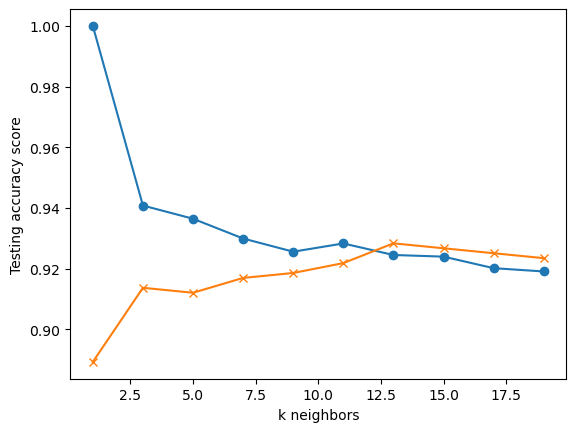

In [918]:
# Loop through different k values to find which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [919]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)
print('k=11 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=7 Test Acc: 0.922


In [920]:
y_true = y_test
y_pred = knn.predict(X_test_scaled)

In [921]:
confusion_matrix(y_true, y_pred)

array([[484,  16],
       [ 32,  82]])

In [922]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       500
           1       0.84      0.72      0.77       114

    accuracy                           0.92       614
   macro avg       0.89      0.84      0.86       614
weighted avg       0.92      0.92      0.92       614



In [925]:
y_pred_proba_knn = knn.predict_proba(X_test_scaled)[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)

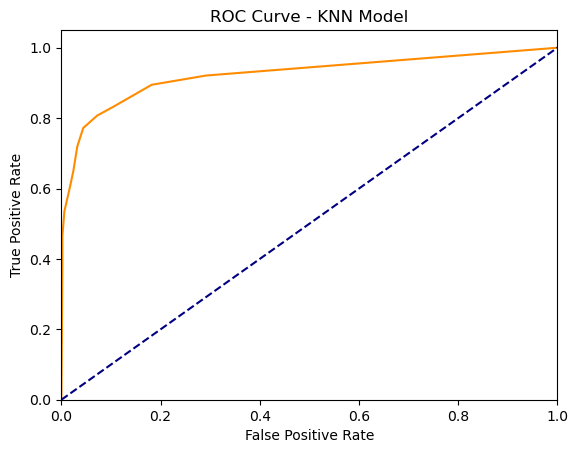

In [926]:
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN Model')
plt.show()

In [927]:
roc_auc_knn = auc(fpr_knn, tpr_knn)
print(f"AUC for the KNN Model: {roc_auc_knn}")

AUC for the KNN Model: 0.9230263157894737


In [928]:
# Read in 2020 data to make our predictions
hoops20_df = pd.read_csv('../Resources/cbb20.csv')
hoops20_df

,RK,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,...,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB
0,1,Kansas,B12,30,28,116.1,87.7,0.9616,53.7,43.7,...,32.6,26.4,35.8,23.2,54.9,42.4,34.1,30.5,67.4,10.8
1,2,Baylor,B12,30,26,114.5,88.4,0.9513,49.4,45.2,...,35.8,29.8,30.8,30.8,47.5,44.4,35.1,31.1,66.2,8.5
2,3,Gonzaga,WCC,33,31,121.3,94.3,0.9472,57.5,47.6,...,33.6,22.7,38.8,21.8,57.4,47.4,38.6,32.0,72.0,7.7
3,4,Dayton,A10,31,29,119.5,93.4,0.9445,59.7,46.6,...,26.4,26.6,33.9,30.9,62.3,45.1,37.1,33.0,67.5,6.8
4,5,Michigan St.,B10,31,22,114.8,91.3,0.9326,52.6,43.3,...,32.8,26.0,30.8,29.3,52.9,43.4,34.8,28.7,69.3,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,349,Arkansas Pine Bluff,SWAC,29,4,80.1,104.3,0.0461,43.1,48.9,...,27.1,30.7,37.4,46.3,44.6,50.2,26.3,31.1,66.1,-20.0
349,350,Maryland Eastern Shore,MEAC,31,5,82.1,108.0,0.0411,40.5,51.0,...,26.2,31.0,25.7,36.6,42.5,51.3,25.0,33.7,67.7,-20.8
350,351,Mississippi Valley St.,SWAC,30,4,89.2,119.0,0.0350,43.0,54.0,...,23.5,35.9,22.9,36.1,42.2,55.5,29.4,34.1,77.4,-22.2
351,352,Kennesaw St.,ASun,29,1,82.2,112.2,0.0269,39.3,55.3,...,25.8,31.2,32.5,30.4,40.2,55.0,24.8,37.1,68.2,-21.8


In [929]:
# Use Random Forest Feature Selector Columns
X = hoops20_df[['W','ADJDE', 'BARTHAG', 'WAB']].values
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [930]:
# Number of teams predicted to make the tournament
predictions = knn.predict(X_scaled)
len(np.where(predictions == 1)[0])

59

In [931]:
prob = knn.predict_proba(X_scaled)

In [932]:
# Loop through for the next highest probability to make the tournament in order to get our number to 68
for i in prob:
    if i[1] >= .44:
        i[1] = 1
        i[0] = 0

In [933]:
pred_df = pd.DataFrame(prob, columns=['No Postseason','POSTSEASON'])
pred_df

,No Postseason,POSTSEASON
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
348,1.0,0.0
349,1.0,0.0
350,1.0,0.0
351,1.0,0.0


In [934]:
df = pred_df.drop(['No Postseason'], axis=1)

In [935]:
df2 = df.loc[df['POSTSEASON'] == 1]

In [936]:
# Create dataframe with column indicating if they are a tournament team or not
hoops_20_Pred = hoops20_df.merge(df2, left_index=True, right_index=True, how='outer')
hoops_20_Pred['POSTSEASON'] = hoops_20_Pred['POSTSEASON'].fillna(0)
hoops_20_Pred

,RK,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,...,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON
0,1,Kansas,B12,30,28,116.1,87.7,0.9616,53.7,43.7,...,26.4,35.8,23.2,54.9,42.4,34.1,30.5,67.4,10.8,1.0
1,2,Baylor,B12,30,26,114.5,88.4,0.9513,49.4,45.2,...,29.8,30.8,30.8,47.5,44.4,35.1,31.1,66.2,8.5,1.0
2,3,Gonzaga,WCC,33,31,121.3,94.3,0.9472,57.5,47.6,...,22.7,38.8,21.8,57.4,47.4,38.6,32.0,72.0,7.7,1.0
3,4,Dayton,A10,31,29,119.5,93.4,0.9445,59.7,46.6,...,26.6,33.9,30.9,62.3,45.1,37.1,33.0,67.5,6.8,1.0
4,5,Michigan St.,B10,31,22,114.8,91.3,0.9326,52.6,43.3,...,26.0,30.8,29.3,52.9,43.4,34.8,28.7,69.3,5.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,349,Arkansas Pine Bluff,SWAC,29,4,80.1,104.3,0.0461,43.1,48.9,...,30.7,37.4,46.3,44.6,50.2,26.3,31.1,66.1,-20.0,0.0
349,350,Maryland Eastern Shore,MEAC,31,5,82.1,108.0,0.0411,40.5,51.0,...,31.0,25.7,36.6,42.5,51.3,25.0,33.7,67.7,-20.8,0.0
350,351,Mississippi Valley St.,SWAC,30,4,89.2,119.0,0.0350,43.0,54.0,...,35.9,22.9,36.1,42.2,55.5,29.4,34.1,77.4,-22.2,0.0
351,352,Kennesaw St.,ASun,29,1,82.2,112.2,0.0269,39.3,55.3,...,31.2,32.5,30.4,40.2,55.0,24.8,37.1,68.2,-21.8,0.0


In [937]:
# Tournament Team Count
hoops_20_Pred['POSTSEASON'].value_counts()

0.0    285
1.0     68
Name: POSTSEASON, dtype: int64

In [938]:
# Read Results to CSV
hoops_20_Pred.to_csv("../Resources/2020Predictions.csv", sep=',', encoding='utf-8')